# **Análise dos filmes avaliados no Rotten Tomatoes**

O sistema de classificação de filmes tornou-se uma parte essencial da indústria cinematográfica, oferecendo ao público uma referência para avaliar a qualidade de um filme. Entre os diversos sistemas de classificação, o Rotten Tomatoes destaca-se como uma das plataformas mais populares e influentes.

O Rotten Tomatoes é um site de agregação de críticas que coleta e analisa avaliações de filmes feitas tanto por críticos profissionais quanto pelo público em geral. A popularidade da plataforma pode ser atribuída à sua abordagem única para classificar filmes, baseada na pontuação do Tomatometer. Essa pontuação é calculada somando o número de críticas positivas feitas pelos principais críticos e comparando-as com o número total de avaliações. Um filme com uma pontuação no Tomatometer de 60% ou mais é considerado "fresco" ("fresh"), enquanto aqueles com pontuação abaixo de 60% são rotulados como "podres" ("rotten"). Esse sistema binário oferece ao público uma maneira clara e concisa de determinar se um filme vale a pena assistir ou não.

Com esta introdução feita, iremos realizar análises envolvendo um dataset adquirido do site Kaggle (https://www.kaggle.com/datasets/subhajournal/movie-rating) sobre genêros de filmes, diretores, críticas, etc.

In [ ]:
# Primeiro, vamos importar as bibliotecas que vamos utilizar durante as nossas análises
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Fiz o download do arquivo em csv de nosso dataset e upei no meu Drive para utilizarmos em nosso notebook
df = pd.read_csv('/content/drive/MyDrive/Rotten Tomatoes Movies.csv')
df

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0,1192.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0,7126.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0,30170.0


In [ ]:
# Vamos entender mais sobre os dados que possuímos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [ ]:
# Em seguida, vamos realizar uma limpeza e transformação em nossos dados para um melhor uso:

# Tirando as duplicatas
df.drop_duplicates(inplace=True)

# Retirando dados que são inúteis para nossa análise
df.dropna(subset=['movie_title', 'tomatometer_rating', 'audience_rating'], inplace=True)

# Preenchendo dados nulos para não perder-los
df['runtime_in_minutes'] = df['runtime_in_minutes'].fillna(df['runtime_in_minutes'].mean())
df['audience_rating'] = df['audience_rating'].fillna(df['audience_rating'].median())
df['critics_consensus'] = df['critics_consensus'].fillna('Sem crítica')
df['genre'] = df['genre'].fillna('Gênero desconhecido')
df['directors'] = df['directors'].fillna('Diretor desconhecido')
df['writers'] = df['writers'].fillna('Roteirista(s) desconhecido')

# E transformando dados
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'])
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'])

In [ ]:
# Vamos visualizar nossos resultados:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16385 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16385 non-null  object        
 1   movie_info          16367 non-null  object        
 2   critics_consensus   16385 non-null  object        
 3   rating              16385 non-null  object        
 4   genre               16385 non-null  object        
 5   directors           16385 non-null  object        
 6   writers             16385 non-null  object        
 7   cast                16125 non-null  object        
 8   in_theaters_date    15666 non-null  datetime64[ns]
 9   on_streaming_date   16384 non-null  datetime64[ns]
 10  runtime_in_minutes  16385 non-null  float64       
 11  studio_name         16010 non-null  object        
 12  tomatometer_status  16385 non-null  object        
 13  tomatometer_rating  16385 non-null  int64         


In [ ]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,Sem crítica,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [ ]:
# Também acho importante modificarmos os nomes das colunas para que um outro desenvolvedor consiga entender melhor este código:
colunas = ['nome_filme', 'descricao', 'critica', 'classificacao', 'genero', 'diretores', 'roteiristas', 'elenco', 'data_lancamento_cinema', 'data_lancamento_streaming', 'duracao',
           'nome_estudio', 'tomatometer_status', 'tomatometer_nota', 'tomatometer_contagem_nota', 'audiencia_nota', 'audiencia_contagem_nota']
df.columns = colunas
df.head()

,nome_filme,descricao,critica,classificacao,genero,diretores,roteiristas,elenco,data_lancamento_cinema,data_lancamento_streaming,duracao,nome_estudio,tomatometer_status,tomatometer_nota,tomatometer_contagem_nota,audiencia_nota,audiencia_contagem_nota
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,Sem crítica,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [ ]:
df.to_csv('meu_dataframe.csv', index=False)

## Com nosso DataFrame modificado e limpo, vamos realizar análises envolvendo nossos dados:

### **Notas do Tomatometer por gênero e sua frequência**

#### **Frequência**

In [ ]:
# Vamos primeiro armazenar apenas os dados necessários
notas_e_generos = df[['genero', 'tomatometer_nota']]
notas_e_generos.head()

,genero,tomatometer_nota
0,"Action & Adventure, Comedy, Drama, Science Fic...",49
1,Comedy,86
2,"Comedy, Romance",68
3,"Classics, Drama",100
4,"Action & Adventure, Drama, Kids & Family",89


In [ ]:
# Após isso, vamos primeiro verificar a frequência desses gêneros de forma separada e plotar um gráfico para ilustrar nossa análise
frequencia_de_generos = notas_e_generos['genero'].str.split(',', expand=True).stack().reset_index(drop=True)
frequencia_de_generos = frequencia_de_generos.value_counts()
frequencia_de_generos

,count
Drama,5461
Comedy,3478
Drama,3453
Action & Adventure,3340
Mystery & Suspense,3050
Art House & International,1933
Comedy,1835
Romance,1783
Science Fiction & Fantasy,1698
Documentary,1517


In [ ]:
# Podemos ver que possuímos gêneros repetidos no value_counts. Vamos renomear nossas colunas e padronizar nossos gêneros para tratar isso?

# Vamos manter a formação original do nosso dataframe de generos
frequencia_de_generos = notas_e_generos['genero'].str.split(',', expand=True).stack().reset_index()

# Em seguida, vamos renomear a nossa coluna
frequencia_de_generos = frequencia_de_generos.rename(columns={0: 'genero'})

# Excluir os dados desnecessários
frequencia_de_generos = frequencia_de_generos.drop(['level_0', 'level_1'], axis=1)

# E padronizando a nomenclatura
frequencia_de_generos['genero'] = frequencia_de_generos['genero'].str.strip()

# Vmaos ver o nosso resultado
frequencia_de_generos = frequencia_de_generos.value_counts().reset_index()
frequencia_de_generos = frequencia_de_generos.rename(columns={'count': 'Frequência'})
frequencia_de_generos

,genero,Frequência
0,Drama,8914
1,Comedy,5313
2,Action & Adventure,3340
3,Mystery & Suspense,3309
4,Art House & International,2381
5,Horror,1877
6,Documentary,1840
7,Romance,1796
8,Science Fiction & Fantasy,1733
9,Classics,1575


*''Drama'' segue sendo o líder em nossos gêneros de filme no Rotten Tomatoes.*

<p style="font-size:38px;">Vamos verificar este fato em um gráfico?</p>

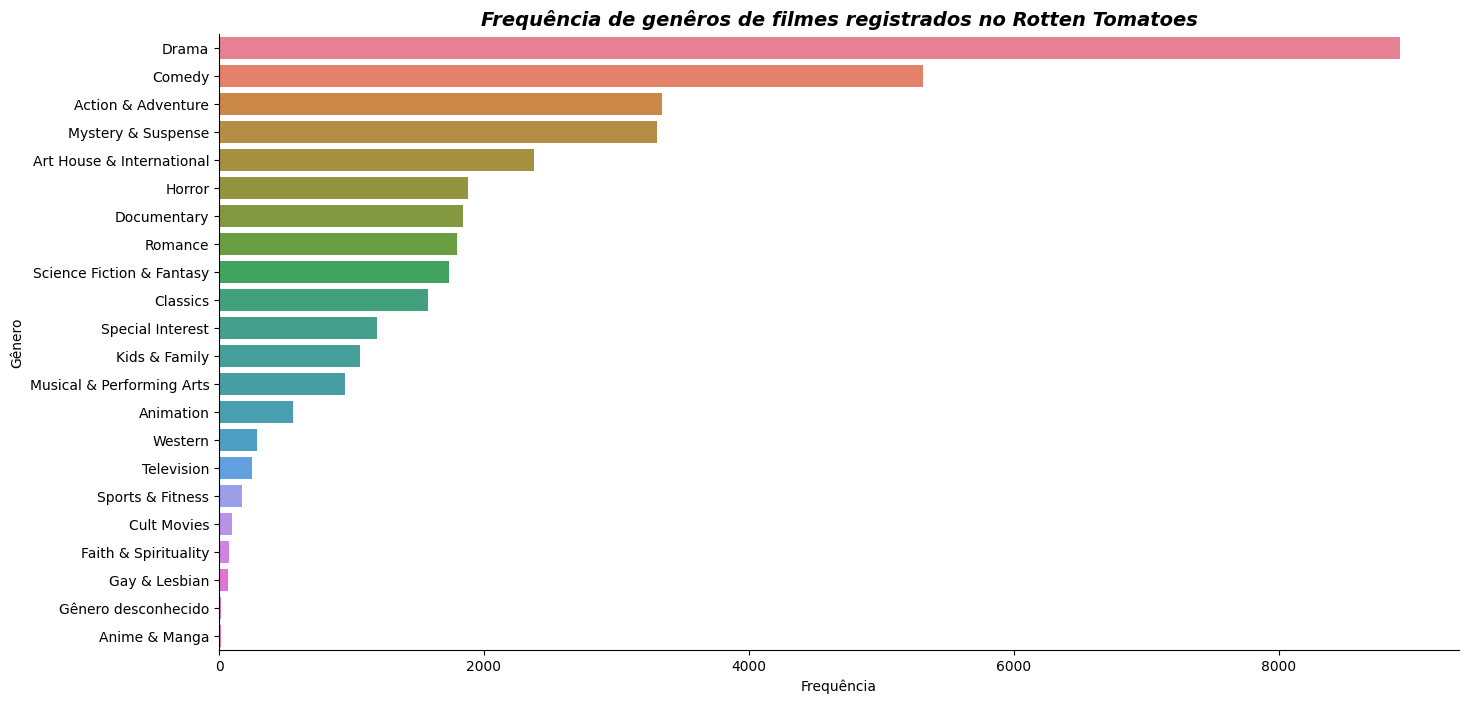

In [ ]:
plt.figure(figsize=(16,8))
paleta = sns.color_palette("hls", 22)

sns.barplot(frequencia_de_generos, x = 'Frequência', y = 'genero', hue=paleta)
plt.xlabel('Frequência')
plt.ylabel('Gênero')
plt.title('Frequência de genêros de filmes registrados no Rotten Tomatoes', fontdict={'size': 14, 'weight': 'bold'}, style='italic')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend().remove()

plt.show()

Nossa tese só se comprova, mostrando que "Drama" é o genêro com mais registros no Rotten, com mais de 8.000 registros no site.

#### **Notas por gênero**

Agora iremos verificar a média de notas por gênero de filme, vamos lá?

In [ ]:
# Primeiro, vamos realizar os mesmos procedimentos para os nomes dos gêneros, mas incluindo também as notas
notas_por_genero = df[['genero', 'tomatometer_nota']]
notas_por_genero['genero'] = notas_por_genero['genero'].str.split(',', expand=True).stack().reset_index(drop=True)
notas_por_genero['genero'] = notas_por_genero['genero'].str.strip()

notas_por_genero

<ipython-input-510-cce12b7b761b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_por_genero['genero'] = notas_por_genero['genero'].str.split(',', expand=True).stack().reset_index(drop=True)
<ipython-input-510-cce12b7b761b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_por_genero['genero'] = notas_por_genero['genero'].str.strip()


,genero,tomatometer_nota
0,Action & Adventure,49
1,Comedy,86
2,Drama,68
3,Science Fiction & Fantasy,100
4,Comedy,89
...,...,...
16633,Action & Adventure,56
16634,Comedy,97
16635,Comedy,78
16636,Comedy,95


In [ ]:
# Agora, iremos fazer um groupby para juntar os gêneros pelas notas, utilizando também a média
notas_por_genero = notas_por_genero.groupby('genero')['tomatometer_nota'].mean().reset_index()

#Também iremos organizar esses valores do maior para o menor
notas_por_genero = notas_por_genero.sort_values(by='tomatometer_nota', ascending=False)

# E vamos arrendondar os valores para resumir o nosso dataframe
notas_por_genero['tomatometer_nota'] = notas_por_genero['tomatometer_nota'].round(decimals=1)

notas_por_genero

,genero,tomatometer_nota
2,Anime & Manga,70.7
6,Cult Movies,68.8
21,Western,64.5
18,Special Interest,62.6
13,Kids & Family,61.6
1,Animation,61.5
16,Romance,61.4
17,Science Fiction & Fantasy,61.3
5,Comedy,61.1
20,Television,60.9


"Anime & Manga" segue sendo o gênero mais bem avaliado do Rotten Tomatoes, enquanto "Drama" (o gênero mais frequente do site) se apresenta em 16° lugar.

Também iremos gerar um gráfico para esta situação, com finalidade de melhorar a nossa análise

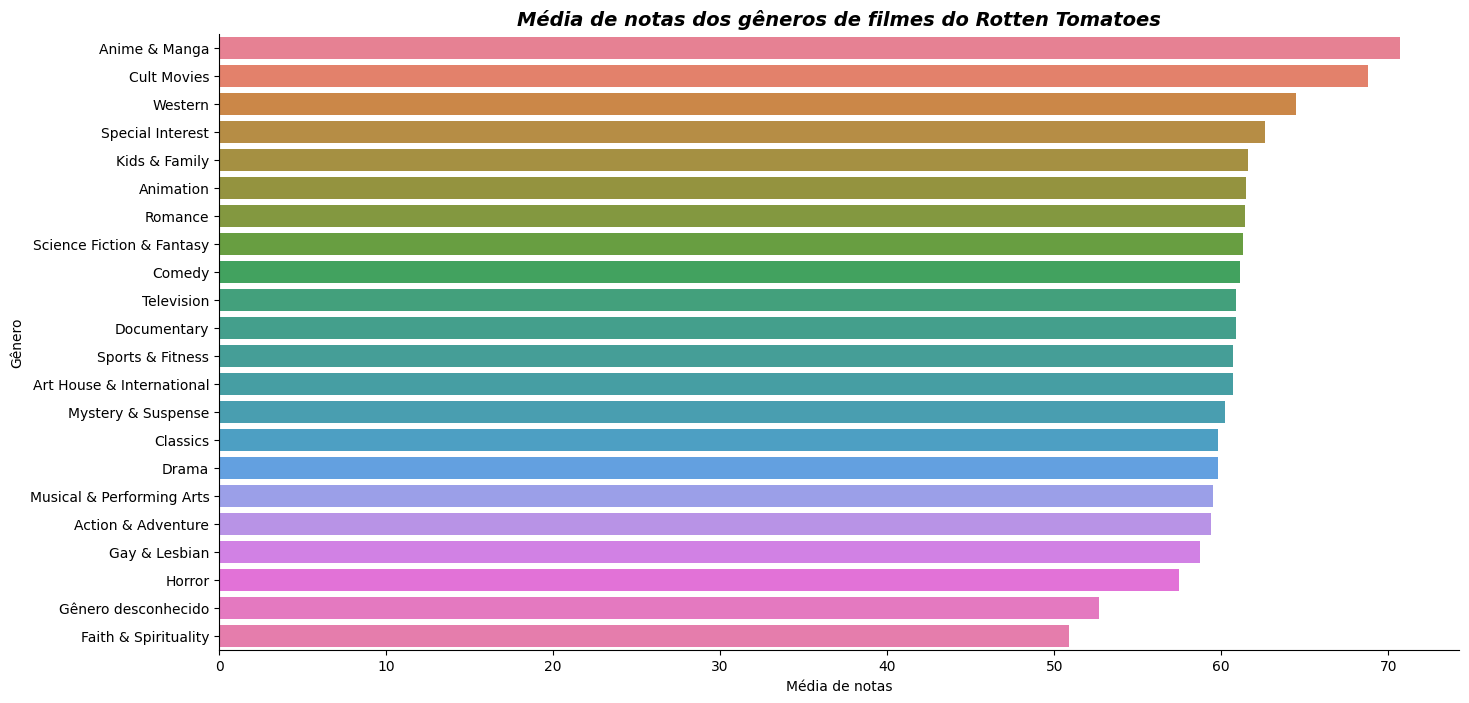

In [ ]:
plt.figure(figsize=(16,8))
paleta2 = sns.color_palette("rocket_r", 22)

sns.barplot(notas_por_genero, x = 'tomatometer_nota', y = 'genero', hue=paleta2)
plt.xlabel('Média de notas')
plt.ylabel('Gênero')
plt.title('Média de notas dos gêneros de filmes do Rotten Tomatoes', fontdict={'size': 14, 'weight': 'bold'}, style='italic')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend().remove()

plt.show()

### **Análise exploratória dos dados**

Também iremos fazer análises aprofundadas de nossos dados para entender a distribuição, correlação e média de alguns valores em nosso DataFrame

#### **Comparando avaliações de público e críticos**

In [ ]:
# Para isso, vamos começar utilizando o método ".corr()" para entender a relação entre esses dois dados
df[['audiencia_nota', 'tomatometer_nota']].corr()

,audiencia_nota,tomatometer_nota
audiencia_nota,1.000000,0.660209
tomatometer_nota,0.660209,1.000000


Podemos ver que não possuímos uma correlação extremamente forte mas é predominantemente de 0.6

#### **Distribuição das notas da crítica**

In [ ]:
# Vamos utilizar um "describe()" e um "hist()" para entender melhor essa distribuição
df['tomatometer_nota'].describe()

,tomatometer_nota
count,16385.000000
mean,60.325542
std,28.587843
min,0.000000
25%,38.000000
50%,66.000000
75%,85.000000
max,100.000000


*Podemos notar que a média de notas dos críticos é de 60.*

<Axes: >

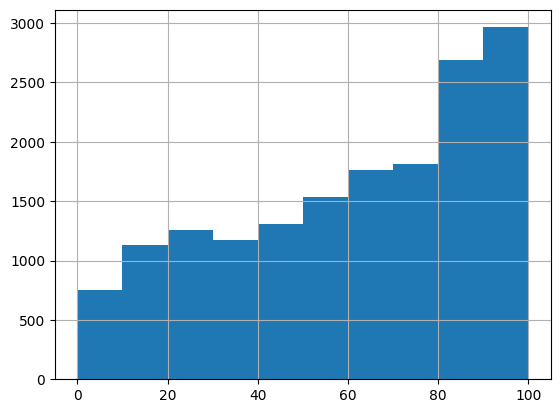

In [ ]:
df['tomatometer_nota'].hist(bins=10)

*Enquanto isso, a maioria das notas estão distribuidas na faixa entre 80-100*

#### **Distribuição das notas da audiência**

In [ ]:
df['audiencia_nota'].describe()

,audiencia_nota
count,16385.00000
mean,60.47159
std,20.46276
min,0.00000
25%,45.00000
50%,62.00000
75%,77.00000
max,100.00000


*A média também se mantém em 60 quando se trata de audiência.*

<Axes: >

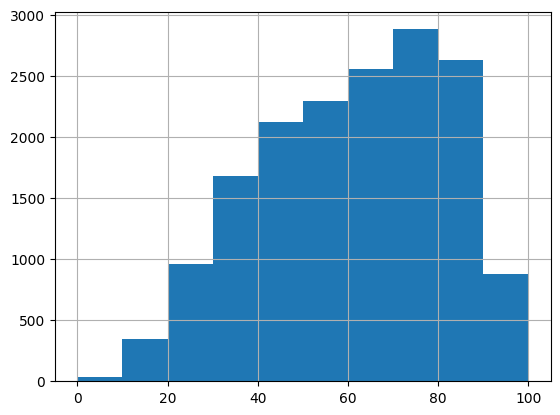

In [ ]:
df['audiencia_nota'].hist(bins=10)

*Entretanto, conseguimos ver uma diferença na distribuição dos críticos e da audiência, onde a audiência costuma dar uma nota entre 60-80.*

#### **Duração dos filmes**

In [ ]:
# Vamos verificar essa informação através também de um "describe()", mas dessa vez, em torno da coluna "duracao"
df['duracao'].describe()

,duracao
count,16385.000000
mean,102.564417
std,24.927040
min,1.000000
25%,90.000000
50%,99.000000
75%,111.000000
max,2000.000000


*A média de minutagem desses filmes é de 102 (1 hora e 40 minutos de duração)*

### **Análise temporal**

Conforme os anos passam, os filmes são lançados mas não temos um valor exato de filmes em cada ano. Vamos descobrir isso juntos!

Iremos separar em datas do **cinema** e data do **streaming**:

#### **Filmes no cinema**

In [ ]:
# Primeiro iremos separar e transformar os nossos dados
df['data_lancamento_cinema'] = pd.to_datetime(df['data_lancamento_cinema'])

filmes_por_ano = df['data_lancamento_cinema'].dt.year.value_counts().sort_index().reset_index()
filmes_por_ano

,data_lancamento_cinema,count
0,1914.0,1
1,1915.0,2
2,1916.0,1
3,1919.0,2
4,1920.0,5
...,...,...
99,2015.0,640
100,2016.0,611
101,2017.0,570
102,2018.0,620


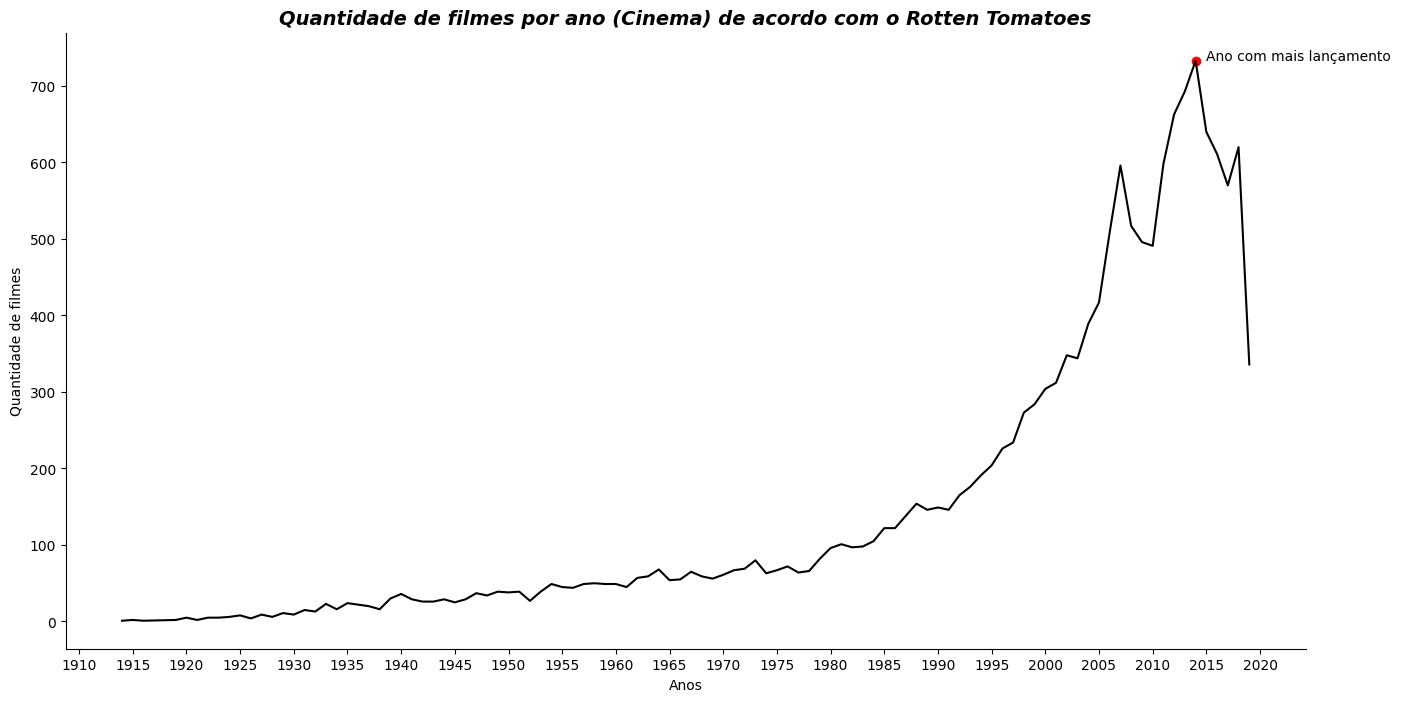

In [ ]:
# Agora iremos plotar um gráfico de linhas para entender a quantidade de filmes por ano e veremos se temos algum ano de destaque
plt.figure(figsize=(16,8))

# Gerando nosso gráfico
sns.lineplot(filmes_por_ano, x = 'data_lancamento_cinema', y = 'count', color='black')
plt.xlabel('Anos')
plt.ylabel('Quantidade de filmes')
plt.title('Quantidade de filmes por ano (Cinema) de acordo com o Rotten Tomatoes', fontdict={'size': 14, 'weight': 'bold'}, style='italic')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.locator_params(axis='x', nbins=30)

# Identificando o pico
pico_idx = filmes_por_ano['count'].idxmax()
pico_x = filmes_por_ano.loc[pico_idx, 'data_lancamento_cinema']
pico_y = filmes_por_ano.loc[pico_idx, 'count']

# Identificando o pico no nosso gráfico
plt.scatter(pico_x, pico_y, color='red')
plt.annotate(
    'Ano com mais lançamento',
    xy=(pico_x, pico_y),
    xytext=(pico_x+1, pico_y+0.3))

plt.show()

*A análise demonstra que 2015 foi o ano com o maior número de lançamentos no cinema. Observa-se uma queda significativa nos lançamentos por volta de 2020, possivelmente devido aos impactos causados pela pandemia da COVID-19, que afetou a indústria cinematográfica globalmente.*

#### **Filmes no streaming**

Vamos realizar o mesmo processo, mas dessa vez, pros filmes que foram lançados em formato de "streaming".

In [ ]:
df['data_lancamento_streaming'] = pd.to_datetime(df['data_lancamento_streaming'])

filmes_por_ano_streaming = df['data_lancamento_streaming'].dt.year.value_counts().sort_index().reset_index()
filmes_por_ano_streaming

,data_lancamento_streaming,count
0,1935.0,1
1,1986.0,1
2,1987.0,1
3,1988.0,3
4,1989.0,1
5,1990.0,11
6,1991.0,26
7,1992.0,31
8,1993.0,15
9,1994.0,24


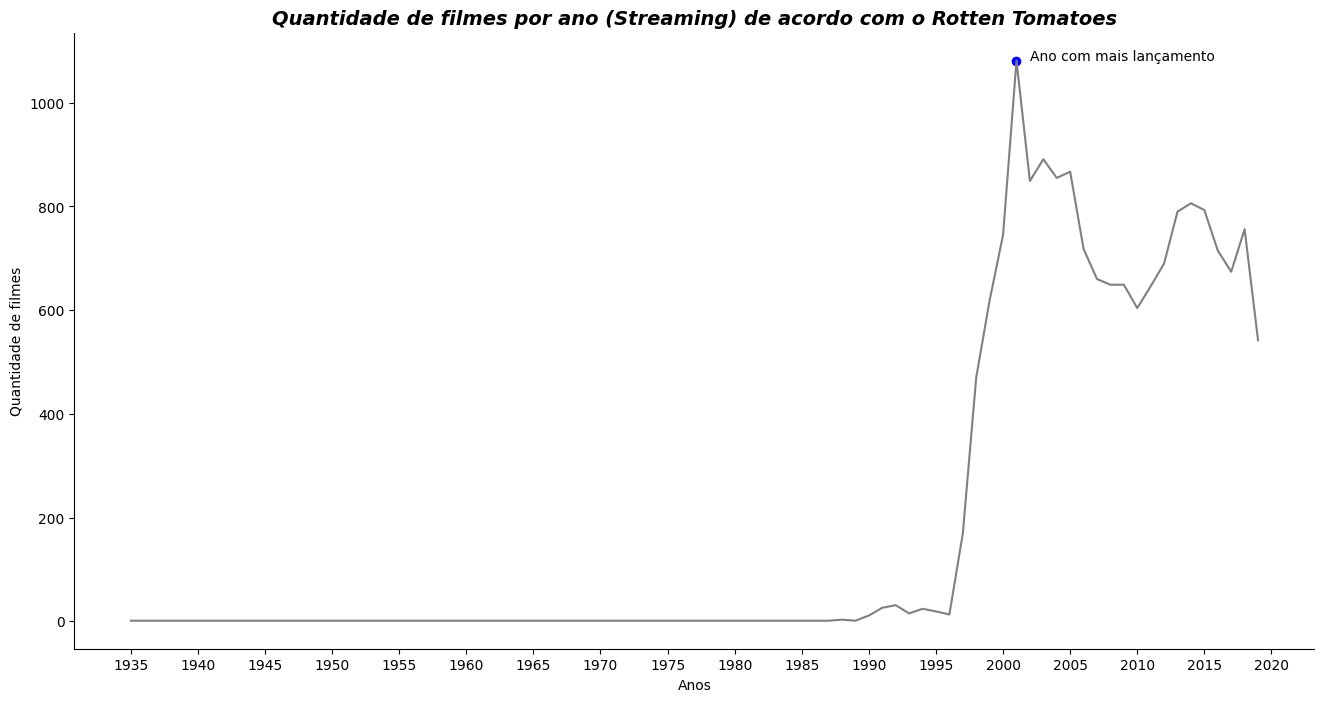

In [ ]:
# E também iremos plotar um gráfico de linhas para os anos de streaming
plt.figure(figsize=(16,8))

# Gerando nosso gráfico
sns.lineplot(filmes_por_ano_streaming, x = 'data_lancamento_streaming', y = 'count', color='grey')
plt.xlabel('Anos')
plt.ylabel('Quantidade de filmes')
plt.title('Quantidade de filmes por ano (Streaming) de acordo com o Rotten Tomatoes', fontdict={'size': 14, 'weight': 'bold'}, style='italic')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.locator_params(axis='x', nbins=30)

# Identificando o pico
pico_idx = filmes_por_ano_streaming['count'].idxmax()
pico_x = filmes_por_ano_streaming.loc[pico_idx, 'data_lancamento_streaming']
pico_y = filmes_por_ano_streaming.loc[pico_idx, 'count']

# Identificando o pico no nosso gráfico
plt.scatter(pico_x, pico_y, color='blue')
plt.annotate(
    'Ano com mais lançamento',
    xy=(pico_x, pico_y),
    xytext=(pico_x+1, pico_y+0.3))

plt.show()

*Podemos observar um pico em lançamentos no ano 2000, possivelmente impulsionado pela popularização dos DVDs, que facilitou o acesso e a distribuição de filmes, resultando em um boom momentâneo nesse período.*

### **Filmes "Certified Fresh" x "Fresh" x "Rotten"**

Os status desses filmes nessa plataforma podem ser três:

*   **Certified Fresh**: Filmes que possuem mais de 75% de aprovação.
*   **Fresh**: Filmes que possuem mais de 60% ou mais de aprovação.
*   **Rotten**: Filme que possui menos de 60% de aprovação.

Com esses dados, conseguimos analisar a porcentagem da quantidade de filmes com avaliação muito positiva (Certified Fresh), positiva (Fresh) e negativa (Rotten).



In [ ]:
# Vamos analisar esta porcentagem em um DataFrame
status_dos_filmes = df['tomatometer_status'].value_counts(normalize=True) * 100
status_dos_filmes = status_dos_filmes.reset_index()
status_dos_filmes = status_dos_filmes.round(0)
status_dos_filmes.columns = ['Status', 'Porcentagem (%)']

status_dos_filmes

,Status,Porcentagem (%)
0,Rotten,44.0
1,Fresh,38.0
2,Certified Fresh,18.0


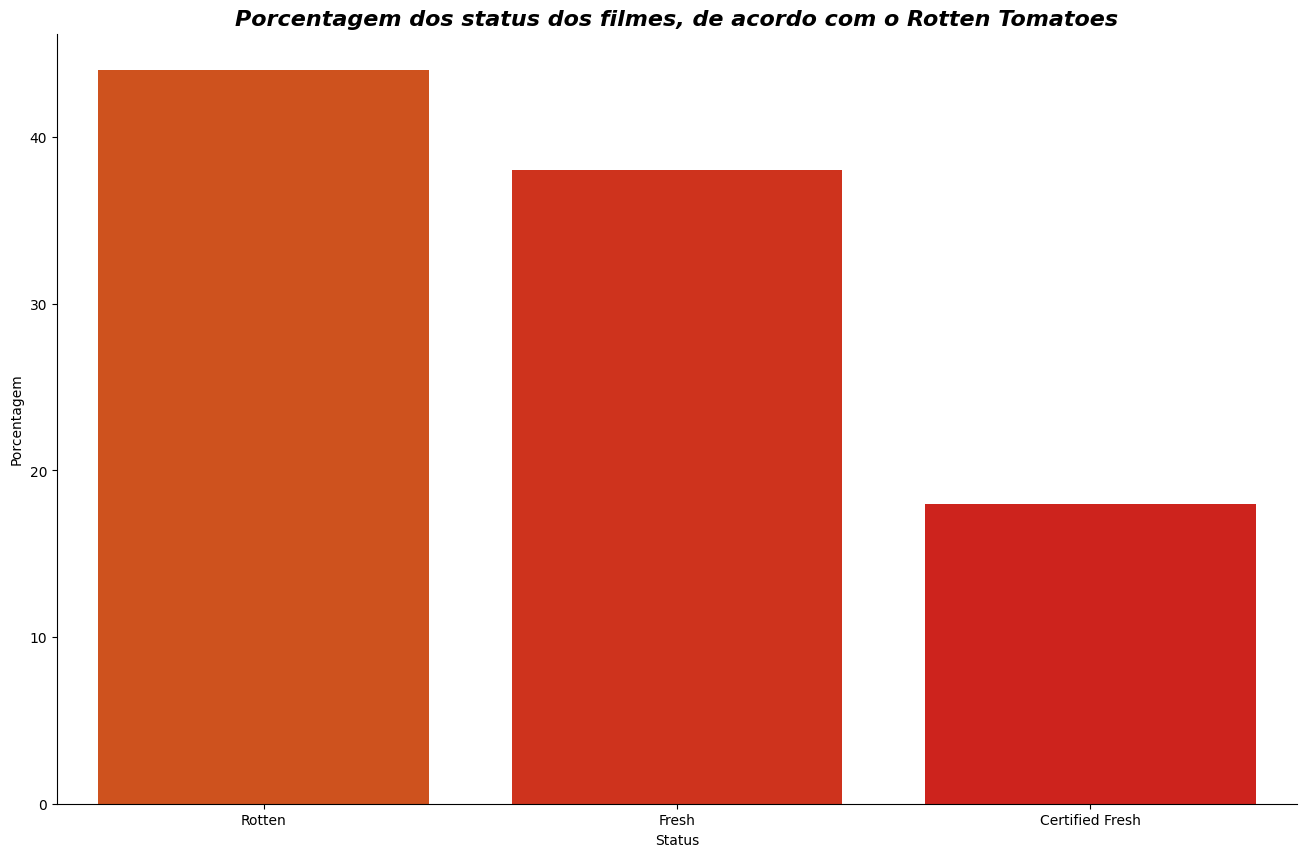

In [ ]:
# E também plotar um gráfico para melhor entendimento

# Ditando o tamanho e as cores
plt.figure(figsize=(16,10))
cores = ['#EB4601', '#EB1D00', '#EA0700']

# Plotando o gráfico
sns.barplot(status_dos_filmes, x='Status', y='Porcentagem (%)', hue ='Status', palette=cores)

# Configurando título e os eixos
plt.title('Porcentagem dos status dos filmes, de acordo com o Rotten Tomatoes', fontdict={'size': 16, 'weight': 'bold'}, style='italic')
plt.xlabel('Status')
plt.ylabel('Porcentagem')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

*Com o gráfico gerado, podemos observar que a maioria dos filmes avaliados neste site recebeu pontuações inferiores a 60%*

### **Os diretores com mais filmes**

Um dado interessante será observar qual diretor que possui mais filmes, vamos descobrir?

In [ ]:
# Como nossos dados de diretor também estão juntos, iremos partir os dados que precisamos e desconstruir realizando o mesmo processo que fizemos aos gêneros de filme

diretores_com_mais_filmes = df[['diretores', 'elenco']]
diretores_com_mais_filmes

,diretores,elenco
0,Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da..."
1,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R..."
2,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ..."
3,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G...."
4,Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L..."
...,...,...
16633,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid..."
16634,"Byron Howard, Rich Moore, Jared Bush","Ginnifer Goodwin, Jason Bateman, Idris Elba, J..."
16635,Diretor desconhecido,"Anthony Quinn, Alan Bates, Irene Papas, Lila K..."
16636,"Cy Endfield, Cyril Endfield","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J..."


In [ ]:
# Iremos realizar a separação dos diretores
diretores_com_mais_filmes['diretores'] = diretores_com_mais_filmes['diretores'].str.split(',', expand=True).stack().reset_index(drop=True)

<ipython-input-526-a3fc39aef395>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diretores_com_mais_filmes['diretores'] = diretores_com_mais_filmes['diretores'].str.split(',', expand=True).stack().reset_index(drop=True)


In [ ]:
# Padronizando os nomes
diretores_com_mais_filmes['diretores'] = diretores_com_mais_filmes['diretores'].str.strip()

<ipython-input-527-49c7faf3caed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diretores_com_mais_filmes['diretores'] = diretores_com_mais_filmes['diretores'].str.strip()


In [ ]:
diretores_com_mais_filmes = diretores_com_mais_filmes['diretores'].value_counts().reset_index()

In [ ]:
diretores_com_mais_filmes

,diretores,count
0,Diretor desconhecido,94
1,Clint Eastwood,34
2,Woody Allen,32
3,Alfred Hitchcock,30
4,Sidney Lumet,28
...,...,...
8075,Michael Rousselet,1
8076,Tomm Jacobsen,1
8077,Jon Salmon,1
8078,Bob Hathcock,1


Podemos ver que temos muitos filmes que não possuímos o dado do diretor.
Para isso não atrapalhar nossa análise, iremos deletar esse dado em nosso DataFrame.

In [ ]:
diretores_com_mais_filmes = diretores_com_mais_filmes.drop(index=0).reset_index(drop=True)
diretores_com_mais_filmes

,diretores,count
0,Clint Eastwood,34
1,Woody Allen,32
2,Alfred Hitchcock,30
3,Sidney Lumet,28
4,Steven Spielberg,28
...,...,...
8074,Michael Rousselet,1
8075,Tomm Jacobsen,1
8076,Jon Salmon,1
8077,Bob Hathcock,1


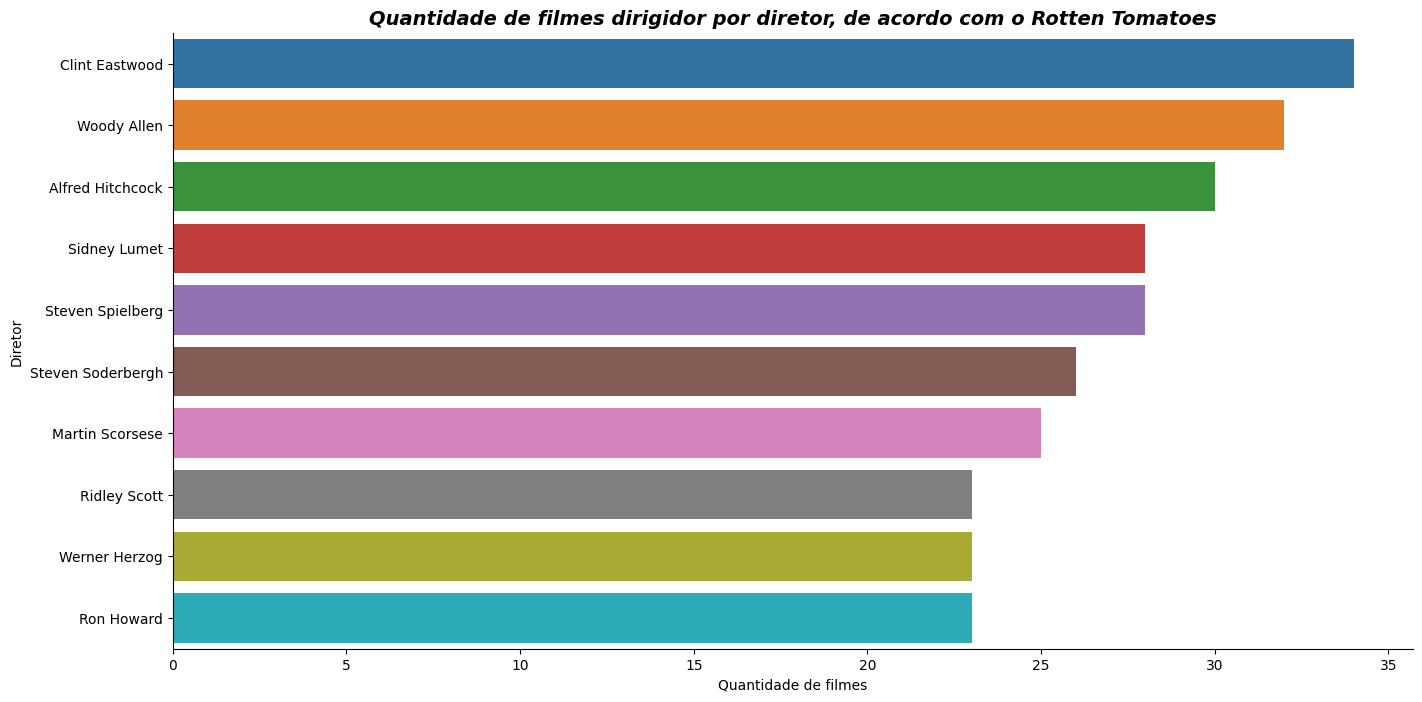

In [ ]:
# E mais uma vez, iremos plotar um gráfico para termos esse dado de forma visual, entretanto possuímos muitos dados de diretor.
# Por isso, iremos fazer um top 10 para facilitar a execução do código:

diretores_com_mais_filmes_top10 = diretores_com_mais_filmes.head(10)

plt.figure(figsize=(16,8))
paleta2 = sns.color_palette("rocket_r", 10)

sns.barplot(diretores_com_mais_filmes_top10, x = 'count', y = 'diretores', hue=paleta2)
plt.xlabel('Quantidade de filmes')
plt.ylabel('Diretor')
plt.title('Quantidade de filmes dirigidor por diretor, de acordo com o Rotten Tomatoes', fontdict={'size': 14, 'weight': 'bold'}, style='italic')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend().remove()

plt.show()

Podemos concluir que, nas avaliações que possuímos em nosso DataFrame, Clint Eastwood lidera o ranking dos top 10 diretores com mais filmes dirigidos e registrados no Rotten Tomatoes.

### **Filmes mais populares em quesito avaliações**

Para finalizarmos nossas análises, iremos verificar o Top 10 de filmes que possuem o maior número de avaliações dentro do nosso Dataframe, vamos lá?

In [ ]:
filme_mais_popular = df[['nome_filme', 'audiencia_contagem_nota']]
filme_mais_popular = filme_mais_popular.sort_values(by='audiencia_contagem_nota', ascending=False).reset_index(drop=True).head(10)
filme_mais_popular

,nome_filme,audiencia_contagem_nota
0,Titanic,35797635.0
1,The Lord of the Rings: The Return of the King,34679773.0
2,Spider-Man,34297354.0
3,Shrek 2,34232524.0
4,Harry Potter and the Goblet of Fire,34153607.0
5,Gladiator,34128168.0
6,"The Chronicles of Narnia: The Lion, The Witch ...",34105114.0
7,American Pie,33781574.0
8,King Kong,33766734.0
9,Star Wars: Episode III - Revenge of the Sith,33683838.0


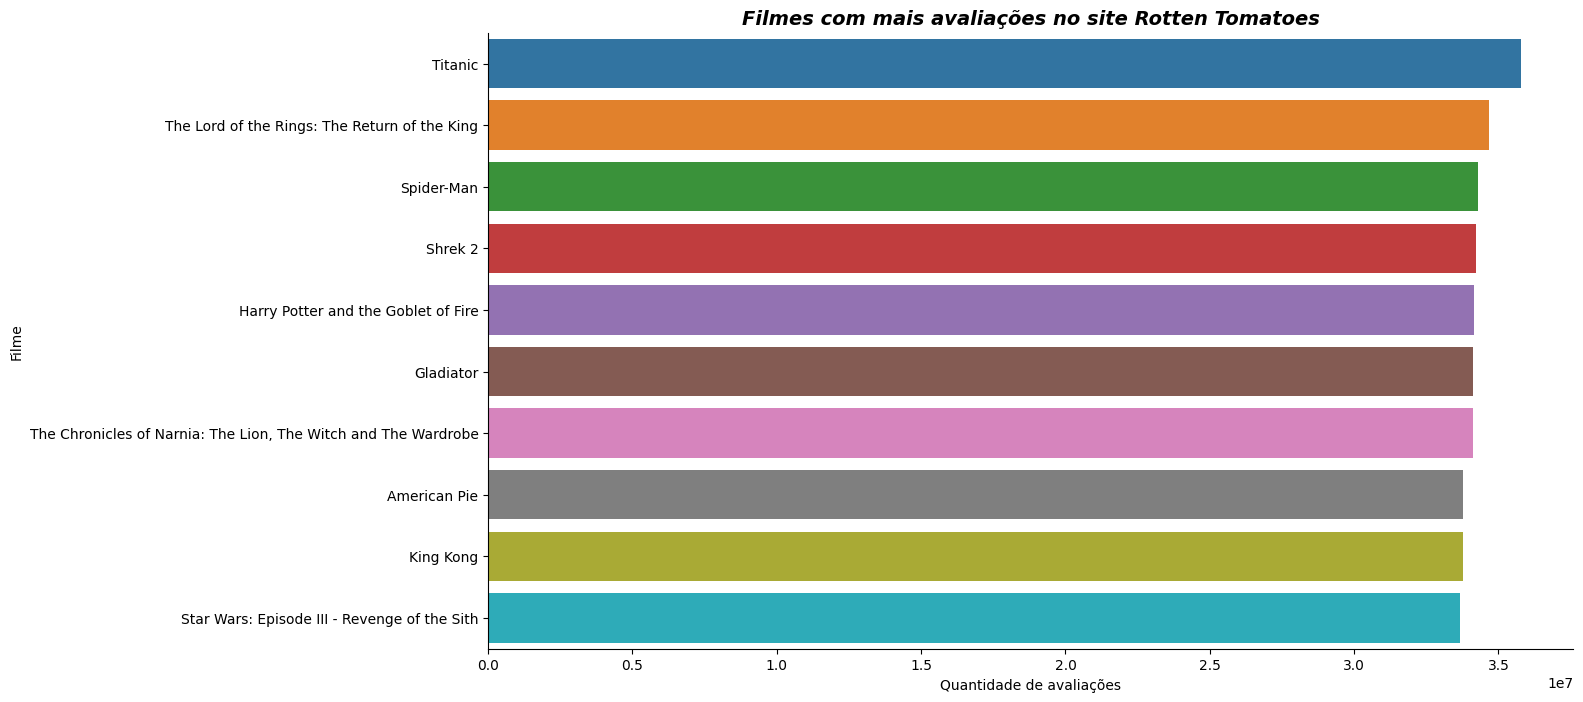

In [ ]:
# Podemos notar que Titanic é o líder em avaliações, mas também vamos mostrar isso em gráfico

plt.figure(figsize=(14,8))
paleta2 = sns.color_palette("rocket_r", 10)

sns.barplot(filme_mais_popular, x = 'audiencia_contagem_nota', y = 'nome_filme', hue=paleta2)
plt.xlabel('Quantidade de avaliações')
plt.ylabel('Filme')
plt.title('Filmes com mais avaliações no site Rotten Tomatoes', fontdict={'size': 14, 'weight': 'bold'}, style='italic')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend().remove()

plt.show()

### **Conclusão**

Utilizando as bibliotecas Pandas, Seaborn e Matplotlib, conseguimos tratar dados retirados do Kaggle sobre os filmes avaliados no site Rotten Tomatoes.

Encontramos algumas dificuldades como a separação dos gêneros dos filmes, mas nada que nos impossibilitasse a realizar nossas análises como:

*   Notas por gênero e as frequências de registros desses gêneros no site
*   Análise exploratória (Correlação de notas críticos x público, distribuição das notas dos críticos x público e média de duração dos filmes)
* Análise temporal dos registros de filmes nos cinemas e nos streamings
* Filmes "Certified Fresh (Muito fresco)" x "Fresh (Frescos)" x "Rotten (Podres)"
* Os diretores com mais filmes
* Filmes mais populares em quesito avaliações


Espero que tenha gostado e que consiga absorver os conhecimentos desse notebook!